In [12]:
import sys
sys.path.append('./code')

In [13]:
from config import row_colors, columns_to_names, row_colors_dict

In [14]:
import make_figure4
reload(make_figure4)
from make_figure4 import *
import pickle

goodinds = pickle.load(open('./intermediate_files/goodinds', 'rb'))
merged_clustdict = pickle.load(open('./intermediate_files/merged_clustdict', 'rb'))
merged_inds_to_subset = pickle.load(open('./intermediate_files/merged_inds_to_subset', 'rb'))
cooldict_50kb = pickle.load(open('./intermediate_files/cooldict_50kb', 'rb'))
ind_to_gene = pickle.load(open('./intermediate_files/ind_to_gene', 'rb'))
all_ind_to_region = pickle.load(open('./intermediate_files/all_ind_to_region', 'rb'))

In [15]:
%load_ext autoreload
%autoreload
import scanpy as sc

sc.settings.set_figure_params(dpi=80, color_map='coolwarm', frameon=True)
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({"axes.grid.axis" : 'both'})
plt.rcParams.update({"axes.grid" : True})

plt.rcParams.update({
    'axes.labelsize': 14,       # x and y labels' font size
    'xtick.labelsize': 8,      # x tick labels' font size
    'ytick.labelsize': 8,      # y tick labels' font size
    'axes.titlesize': 14,        # Axes title font size
    'patch.linewidth' : .35,
    'lines.linewidth' : .5,
    'legend.fontsize': 6,      # Legend font size
})
plt.rcParams['pdf.fonttype'] = 42

plt.rcParams.update({
    'axes.labelsize': 8,       # x and y labels' font size
    'xtick.labelsize': 6,      # x tick labels' font size
    'ytick.labelsize': 6,      # y tick labels' font size
    'axes.titlesize': 10,        # Axes title font size
    'patch.linewidth' : .35,
    'lines.linewidth' : .5,
    'xtick.major.pad' : 2,
    'ytick.major.pad' : 2,

})
plt.rcParams['axes.linewidth'] = .25
plt.rcParams['xtick.major.width'] = .25
plt.rcParams['ytick.major.width'] = .25
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['grid.linewidth'] = .25

plt.rcParams['axes.facecolor'] = 'none' # Or any suitable colour...
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'none'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
from initialize import *

treg_250kb = cooler.Cooler('./Treg_all.mcool::/resolutions/250000')
treg_50kb = cooler.Cooler('./Treg_all.mcool::/resolutions/50000')

(chromsizes, parsed_chroms, region_to_inds, 
    all_region_to_ind, inds_to_region, all_ind_to_region, 
    chrom_to_start, chrom_to_end) = initialize_helper_vars(treg_250kb)


In [17]:
indsoi = list(set([156, 4379, 5065, 9078, 278, 5559, 7060, 7050, 7467, 2690, 5367, 6540, 8205, 5547, 4380, 9077, 5529, 4443, 6324, 3207,
          6415, 8368, 2874, 4383, 6325, 8373, 5065, 5338, 6292, 6317, 6400, 5366, 4893, 6392, 3071, 1411, 3170, 891, 4384, 5082, 
          5064, 6540, 5304, 5529, 4379, 1923, 4380, 7050, 6324, 5367, 243, 242
         ]))

In [20]:
%autoreload 2
from hub_pileup import pileup_bin_pairs

padding_size = 50

our_treg_25kb = cooler.Cooler('./Treg_all.mcool::/resolutions/25000')
our_tcon_25kb = cooler.Cooler('./Tconv_all.mcool::/resolutions/25000')

metadomain_pileup_cooldict = {
    'Our_Treg' : our_treg_25kb,
    'Our_Tcon' : our_tcon_25kb,
}

df1 = pd.DataFrame()
df1['ind'] = indsoi
df1['chrom'] = [all_ind_to_region[x][0] for x in df1['ind']]
df1['cluster'] = -1

df2 = pd.DataFrame()
df2['ind'] = goodinds
df2['chrom'] = [all_ind_to_region[x][0] for x in goodinds]
df2['cluster'] = merged_clustdict['all']
df2 = df2[df2['cluster'].isin([0, 4, 18])]


differential_mat_dict, differential_metadata = pileup_bin_pairs(df1, df2, metadomain_pileup_cooldict,
                                                                chrom_to_start, None, 
                                                                None, resolution_in=250_000, resolution_out = 25_000, 
                                                                intra=False, inter=True, padding_size=padding_size, fetch_oe=True,
                                                                skip_metadomains = True,
                                                               )

Done with 8
Done with 8
Done with 8
Done with 8
Done with 8
Done with 8
Done with 8
Done with 8
Done with 8
Done with 8
Done with 8
Done with 8
Done with 8
Done with 8
Done with 8
Done with 8
Done with 8
Done with 8
Done with 8
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 12
Done with 17
Done with 17
Done with 17
Done with 17
Done with 17
Done with 17
Done with 17
Done with 17
Done with 17
Done with 17
Done with 17
Done with 17
Done with 17
Done with 17
Done with 17
Done with 17
Done with 17
Done with 17
Done with 17
Done with 4
Done with 4
Done with 4
Done with 4
Done with 4
Done with 4
Done with 4
Done with 4
Done with 4
Done with 4
Done with 4
Done with 4
Done with 4
Done with 4
Done with 4
Done with 4
Done with 4
Done with 4
Done with 4
Done with 13
Done with 13
Done with 13
Done with 1

Figure 5D and S17B.

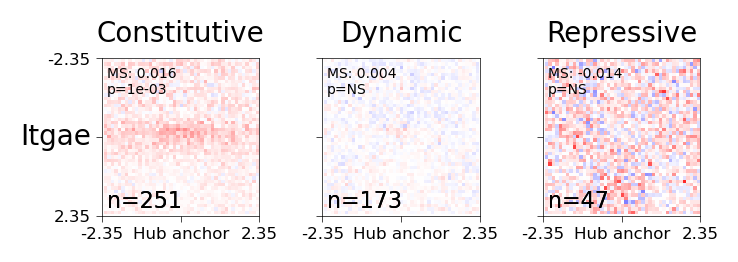

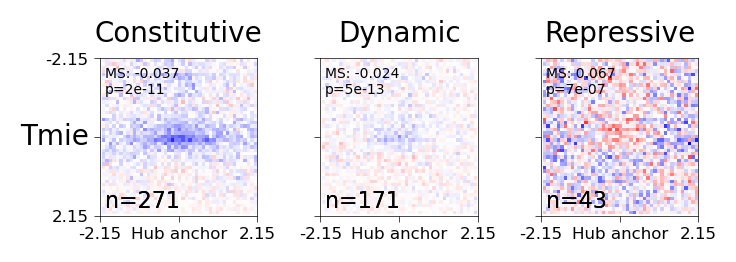

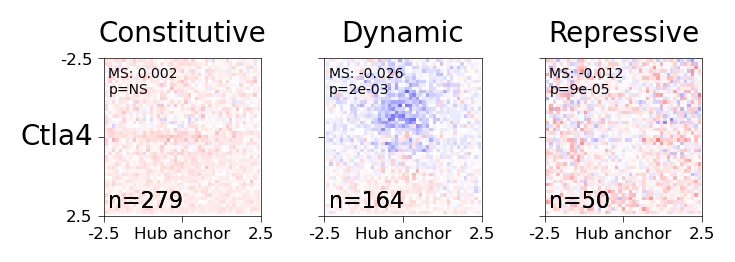

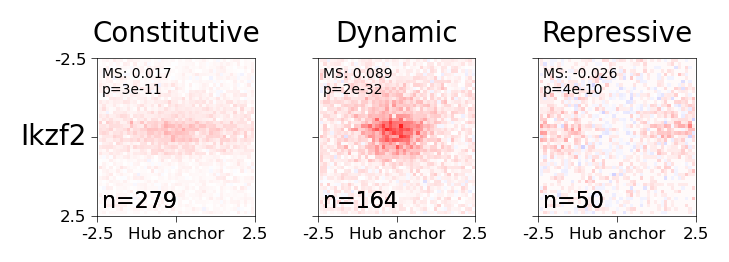

In [115]:
from hub_pileup import plot_pileup_mat
from collections import defaultdict
results_dict = defaultdict(dict)
for ind in [6400, 5529, 243, 278]:
    ms = []
    if (differential_metadata['ind1']==ind).sum()==0:
        continue

    name = get_name(ind, ind_to_gene)
    fig, axs = init_subplots_exact(3, 1, fgsz=(20*mm, 20*mm), dpi = 100, xspace=1.4)
    for c, cluster in enumerate([0, 4, 18]):
        plt.sca(axs[c])
        idx = ( ((differential_metadata['ind1']==ind) & (differential_metadata['cluster2']==cluster)) | 
                ((differential_metadata['ind2']==ind) & (differential_metadata['cluster1']==cluster))
              )
        rows = []
    
        mats = (differential_mat_dict['Our_Treg'][idx] - differential_mat_dict['Our_Tcon'][idx])[:, 28:-22, 28:-22]
        results = plot_pileup_mat(mats,  plt.gca(), cmap = 'bwr', vmin=-.3, vmax=.3, center=5,
                                              method='center_square',
                                             show_filts=False,
                                  s2=-1,
                                 )
        results_dict[ind][cluster] = results
    
        plt.title(columns_to_names[cluster])
        plt.grid(False)
        plt.text(.03, .05, f'n={idx.sum()}', transform=plt.gca().transAxes, fontsize=8)
        
        
    n = len(mats)
    cutoff = n*50_000/1e6
    mb = mats.shape[1]*50e3 // 2 / 1e6
    x1, x2 = all_ind_to_region[ind][1], all_ind_to_region[ind][2]
    xs = np.arange(x1 - 50_000*20, x2 + 50_000*20, 50_000)
    
    for c, a in enumerate(axs):
        plt.sca(axs[c])
    
        plt.yticks([-mb, 0, mb])
        plt.gca().set_yticklabels([-cutoff, f'{name}', cutoff])
        plt.gca().get_yticklabels()[1].set_fontsize(10)
        plt.gca().get_yticklabels()[1].set_rotation(0)
        plt.gca().get_yticklabels()[1].set_va('center')
    
        plt.gca().set_xticks([-mb, 0, mb])
        plt.gca().set_xticklabels([-cutoff, "Hub anchor", cutoff])
    
        a.tick_params(labeltop = False, top = False, labelbottom = True, bottom = True)
        if c % n != 0 :
            plt.gca().tick_params(labelleft=False)
    fig.savefig(f'./plots/paper/fig5/diff_ms_pileup_{name}.pdf', bbox_inches='tight')

In [73]:
from itertools import combinations

all_datas = []
for u in [0, 4,]:
    idx = (differential_metadata['cluster1']==u) & (differential_metadata['cluster2']==u)
    for key in [6400, 5529, 243, 278]:
        data = pd.DataFrame()
        difference = results_dict[key][u][2]['v_middle'] - results_dict[key][u][2]['v_outside']
        data[key] = difference
        data['cluster'] = columns_to_names[u]
        all_datas.append(data)

all_data = pd.concat(all_datas, axis=0)
all_data = all_data.melt('cluster')



In [98]:
%autoreload 2
from plot_pvals import *

1


/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python

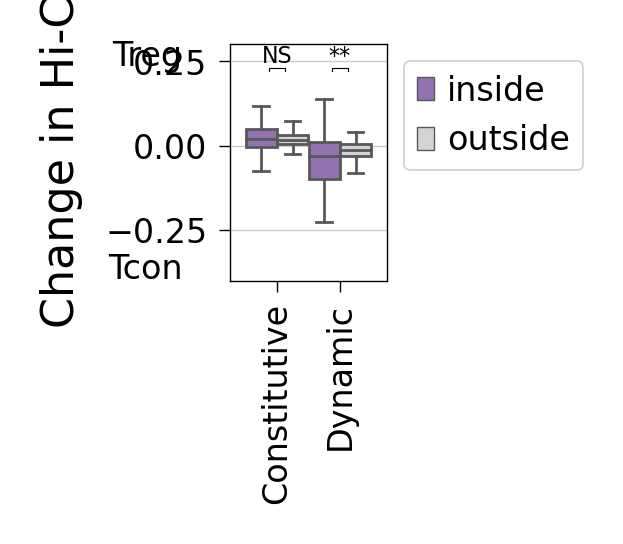

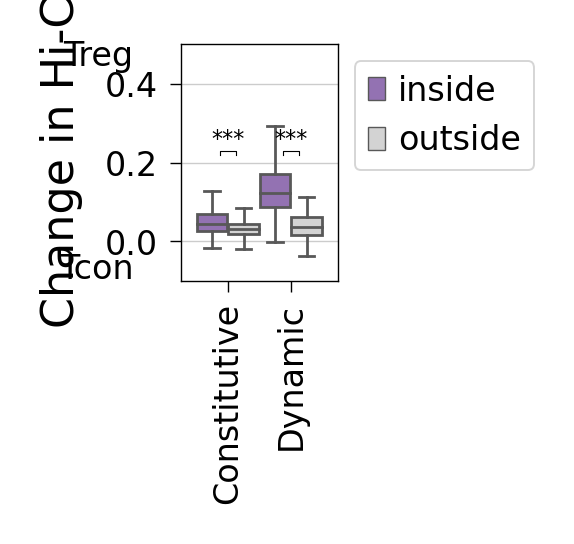

In [114]:
from plot_pvals import *
import itertools
ylims = [[-.4, .3], [-.1, .5]]
ymaxes = [.22, .4]
for c, ind in enumerate([243, 278]):
    rows = []

    for cluster in [0, 4]:
        data_inside = results_dict[ind][cluster][2]['v_middle']
        data_outside = results_dict[ind][cluster][2]['v_outside']
        data_in =  zip(*[['inside']*len(data_inside), data_inside, [columns_to_names[cluster]]*len(data_inside)])
        data_out = zip(*[['outside']*len(data_outside), data_outside, [columns_to_names[cluster]]*len(data_outside)])
        rows.extend(data_in)
        rows.extend(data_out)
    data = pd.DataFrame(rows, columns = ['loc', 'values', 'hub'])
    
    fig, axs = init_subplots_exact(1, 1, fgsz=(10*mm, 15*mm), dpi = 200)
    sns.boxplot(data, x='hub', y='values', hue='loc', palette=['tab:purple', 'lightgray'], showfliers=False,
               width = 1)
    plt.gca().set_axisbelow(True)
    plt.legend(bbox_to_anchor=(1, 1), title_fontsize=6)
    plt.title('')
    plt.ylabel("Change in Hi-C")
    add_yaxis_labels('Tcon', 'Treg', plt.gca(), fontsize=6, x = -.3)
    plt.xlabel("")
    
    order = ['Constitutive', 'Dynamic']
    hue_order = ['inside', 'outside']
    pairs = [((x, h1), (x, h2)) for x in order for h1, h2 in itertools.combinations(hue_order, 2)]
    plt.ylim(ylims[c])
    add_stat_annotation_boxplot_with_hue(plt.gca(), data, 'hub', 'values', 'loc',
                                     order, hue_order, pairs, ymax=.2, delta = .22,
                                         yoff_method = 'add',
                                         h=.01,
                                         hue_offset=-.25,
                                        )
    fig.savefig(f'./plots/paper/fig5/quantification_figured_{ind}.pdf', bbox_inches='tight')